# EU climate change mitigation targets compromise forest ecosystem services and biodiversity

## Germany


Above the code cells, there are short instructions how the users can modify the codes in the cells. If there are no instructions, no changes should be needed for the cell by default.

A detailed description is provided in the README.md.

## Basic definitions
Simulated forest data - name and climate scenario

Specify policy scenario:

- "FS" -  National Forest Strategy
- "BDS" - Biodiversity Strategy
- "BES" - Bioeconomy Strategy

In [1]:
scenario ="NFS"

## Specify "if" and "which" GLOBIOM scenario is used

**ATTENTION**: each scenario relates to specific CC simulation!<br>
Three scenarios define the perdiodic future demand for log, pulp/fuelwood, and forest residues.<br>
- 1.5 degrees - RCP 0 (no CC)
- LTS - RCP 2.6
- NDC - RCP 4.5


In [2]:
RCP = "RCP0"  # "RCP0"  or "RCP26" or "RCP45"

In [3]:
glob_demands = True # True or False

In [4]:
approach = "bottomup" # "topdown" or "bottomup"

## Read the data

In [5]:
import os
import numpy as np
import sys
import requests
import wget

In [6]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/py_class")

import multiFunctionalOptimization as MFO

### Read .py class

In [7]:
if glob_demands == True : 
    nameGLOB = "_GLOB"
else :
    nameGLOB = ""

In [8]:
import multiFunctionalOptimization as MFO

In [9]:
from importlib import reload
reload(MFO)

<module 'multiFunctionalOptimization' from '/home/ubuntu/workspace/mf_optimization_demo/py_class/multiFunctionalOptimization.py'>

In [10]:
mfo = MFO.MultiFunctionalOptimization()

'Using CLP'

In [11]:
filename = "rslt_"+RCP+"_Bavaria_Germany_pause_2_V1"+nameGLOB+".zip"
filename

'rslt_RCP0_Bavaria_Germany_pause_2_V1_GLOB.zip'

### Import data

In [12]:
if not filename in os.listdir("."):
    url = "https://syncandshare.lrz.de/dl/fiQMgp5WcrfEe9sJUZptH7Mu/Data/"+filename
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)


### Read data

In [13]:
%%time
mfo.readData(filename,
             sampleRatio=0.2 #If no sample ratio given, the ratio is assumed to be 1
            ) 

/home/ubuntu/anaconda3/envs/my_env/lib/python3.8/site-packages/pandas/core/generic.py:2490: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['regime', 'ecoregion', 'region', 'NUTS2'], dtype='object')]

  pytables.to_hdf(


'sample size 745/3725(20%)'

CPU times: user 11.1 s, sys: 787 ms, total: 11.8 s
Wall time: 11.8 s


In [14]:
mfo.data.columns

Index(['year', 'id', 'regime', 'ecoregion', 'V_strat', 'V_strat_reg',
       'Ve_strat', 'Vm_strat', 'iV_strat', 'pct_coni', 'pct_reg_coni',
       'pct_deci', 'pct_reg_deci', 'spruce_pct', 'spruce_reg_pct', 'fir_pct',
       'fir_reg_pct', 'pine_pct', 'pine_reg_pct', 'larch_pct', 'larch_reg_pct',
       'beech_pct', 'beech_reg_pct', 'oak_pct', 'oak_reg_pct',
       'douglasfir_pct', 'douglasfir_reg_pct', 'hardbrl_pct',
       'hardbrl_reg_pct', 'softbrl_pct', 'softbrl_reg_pct', 'spi', 'spi_reg',
       'maxh', 'maxh_reg', 'spint', 'freq_h_0_50', 'freq_h_50_80',
       'freq_h_80_100', 'cntlayers', 'shan_species', 'shan_species_reg',
       'shan_height', 'volHa_dbhGR10', 'volHa_dbhGR20', 'volHa_dbhGR30',
       'volHa_dbhGR40', 'volHa_dbhGR50', 'volHa_dbhGR60', 'volHa_dead_dbhGR30',
       'volHa_dead_dbhGR40', 'volHa_dead_dbhGR50', 'volHa_dead_dbhGR60',
       'sawntimber', 'industrywood', 'yieldloss', 'remaininstand',
       'represented_area_by_NFIplot', 'region', 'NUTS2', 'clear_c

## Create new columns

In [15]:
if glob_demands == True :     
    glob_sawlogs = mfo.data.groupby('year')['GLOBsawlogs'].apply(lambda x: list(np.unique(x)))
    df = glob_sawlogs.to_frame().reset_index()
    df = df["GLOBsawlogs"]
    flattened_list = [y for x in df for y in x]
    glob_sawlogs = flattened_list
    glob_sawlogs

In [16]:
if glob_demands == True : 
    glob_pulwood = mfo.data.groupby('year')['GLOBpulpwood'].apply(lambda x: (np.unique(x)))
    df = glob_pulwood.to_frame().reset_index()
    df = df["GLOBpulpwood"]
    flattened_list = [y for x in df for y in x]
    glob_pulwood = flattened_list
    glob_pulwood

In [17]:
if glob_demands == True : 
    glob_residues = mfo.data.groupby('year')['GLOBresidues'].apply(lambda x: (np.unique(x)))
    df = glob_residues.to_frame().reset_index()
    df = df["GLOBresidues"]
    flattened_list = [y for x in df for y in x]
    glob_residues = flattened_list
    glob_residues

In [18]:
if glob_demands == True : 
    glob_fuelwood = mfo.data.groupby('year')['GLOBfuelwood'].apply(lambda x: (np.unique(x)))
    df = glob_fuelwood.to_frame().reset_index()
    df = df["GLOBfuelwood"]
    flattened_list = [y for x in df for y in x]
    glob_fuelwood = flattened_list
    glob_fuelwood

In [19]:
if glob_demands == True : 
    zipped_lists = zip(glob_pulwood, glob_fuelwood)
    glod_pulp_fuel = [x + y for (x, y) in zipped_lists]
    glod_pulp_fuel

In [20]:
mfo.data["HarvestedVolume"] = (mfo.data["Ve_strat"].values)*mfo.data["represented_area_by_NFIplot"].values

In [21]:
mfo.data["CarbonBalance"] = (mfo.data["BalanceCarbonTotalYear"].values)*mfo.data["represented_area_by_NFIplot"].values

In [22]:
mfo.data["AnnualIncrement"] = mfo.data["iV_strat"].values*mfo.data["represented_area_by_NFIplot"].values

In [23]:
mfo.data["speciesProfileIndex"] = mfo.data["spi"].values 

In [24]:
mfo.data["VolumeLargeTrees"] = mfo.data["volHa_dbhGR60"].values*mfo.data["represented_area_by_NFIplot"].values

In [25]:
mfo.data["speciesInterminglingIndex"] = mfo.data["spint"].values

In [26]:
mfo.data["ShannonIndexSpecies"] = mfo.data["shan_species"].values

In [27]:
mfo.data["ShannonIndexTreeHeight"] = mfo.data["shan_height"].values

In [28]:
mfo.data["standingVolume"] = mfo.data["V_strat"]*mfo.data["represented_area_by_NFIplot"].values

In [29]:
mfo.data["noNaturalSpecies"] = mfo.data.apply(lambda x: sum([x[name] for name in mfo.data.columns if "pnv" in name]),axis=1)

In [30]:
mfo.data["stateForest"] = mfo.data['landtenure'].apply(lambda x: 1 if x < 1000 else 0)

In [31]:
mfo.data["SawTimber"] = mfo.data["V Sawlogs"].values*mfo.data["represented_area_by_NFIplot"].values

In [32]:
mfo.data["PulpWood"] =mfo.data["V PulpWood"].values*mfo.data["represented_area_by_NFIplot"].values

In [33]:
mfo.data["ForestResidues"] =mfo.data["V HarvestResidues"].values*mfo.data["represented_area_by_NFIplot"].values

In [34]:
mfo.data["Fuelwood"] = mfo.data["fuelwood"].values*mfo.data["represented_area_by_NFIplot"].values

In [35]:
mfo.data["energyProds"] =mfo.data["CFsawlogsToEnergy"].values*mfo.data["represented_area_by_NFIplot"].values

In [36]:
mfo.data["TotalLivingCarbon"] = (mfo.data["CSagbLivingTotal"].values + mfo.data["CSbgbLivingTotal"].values )*mfo.data["represented_area_by_NFIplot"].values

In [37]:
mfo.data["pnvDeviation"] =((mfo.data["pnv_spruce"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["spruce_pct"].values)**2 + 
                      (mfo.data["pnv_beech"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["beech_pct"].values)**2 +
                      (mfo.data["pnv_pine"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["pine_pct"].values)**2+
                      (mfo.data["pnv_fir"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["fir_pct"].values)**2+
                      (mfo.data["pnv_oak"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["oak_pct"].values)**2)

<ipython-input-37-a5a52783099c>:1: RuntimeWarning: invalid value encountered in true_divide
  mfo.data["pnvDeviation"] =((mfo.data["pnv_spruce"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["spruce_pct"].values)**2 +
<ipython-input-37-a5a52783099c>:2: RuntimeWarning: invalid value encountered in true_divide
  (mfo.data["pnv_beech"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["beech_pct"].values)**2 +
<ipython-input-37-a5a52783099c>:3: RuntimeWarning: invalid value encountered in true_divide
  (mfo.data["pnv_pine"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["pine_pct"].values)**2+
<ipython-input-37-a5a52783099c>:4: RuntimeWarning: invalid value encountered in true_divide
  (mfo.data["pnv_fir"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["fir_pct"].values)**2+
<ipython-input-37-a5a52783099c>:5: RuntimeWarning: invalid value encountered in true_divide
  (mfo.data["pnv_oak"].values*100/mfo.data["noNaturalSpecies"].values - mfo.data["o

In [38]:
import numpy as np

In [39]:
mfo.data["pnvDeviation"].replace(np.nan,0,inplace=True)

In [40]:
mfo.data["pnvDeviation"]

5           8483.904800
7           6449.696100
21         15221.355800
23         16714.163600
24          6666.666667
               ...     
1009453     5443.435200
1009465        0.000000
1009469     7776.125000
1009471    14572.982500
1009474    20000.000000
Name: pnvDeviation, Length: 201895, dtype: float64

In [41]:
mfo.data[mfo.regimesEnu].value_counts()

BAU_0            13410
NOT              13410
BAU_RR_p1        13410
CCF_STATE        13410
CCF_P3_p2        13410
CCF_P3           13410
BAU_0_p1         13410
BAU_1            13410
BAU_FS1          13410
CCF_P3_p1        13410
BAU_0_p2         13410
BAU_RR_p2        13410
CCF_P2           13410
BAU_RR           13410
CCF_P1           13410
initial_state      745
Name: regime, dtype: int64

### Add column to restrict SA¶

In [42]:
regimeClassNames = {"regimeClass0name":"CCF","regimeClass1name":"SA"}
regimeClassregimes = {"regimeClass0regimes":["CCF_P3 ","CCF_P3_p1","CCF_P3_p2"],"regimeClass1regimes":["NOT"]}

In [43]:
mfo.addRegimeClassifications(regimeClassNames = regimeClassNames,regimeClassregimes=regimeClassregimes)

In [44]:
mfo.finalizeData(initialRegime="initial_state")

In [45]:
mfo.initialData.head()

,,,ecoregion,V_strat,V_strat_reg,Ve_strat,Vm_strat,iV_strat,pct_coni,pct_reg_coni,pct_deci,pct_reg_deci,...,stateForest,SawTimber,PulpWood,ForestResidues,Fuelwood,energyProds,TotalLivingCarbon,pnvDeviation,CCF_forests,SA_forests
id,year,regime,,,,,,,,,,,,,,,,,,,,,
6,2012,initial_state,9.6.2,138.631058,0.0,0.0,0.0,138.631058,36.0,0.0,64.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,53294.405274,3532.1936,False,False
10,2012,initial_state,9.15.5,228.104820,0.0,0.0,0.0,228.104820,7.0,0.0,93.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,45645.839112,2788.2760,False,False
14,2012,initial_state,9.5.2,182.529020,0.0,0.0,0.0,182.529020,5.0,0.0,95.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,36610.808570,2207.9282,False,False
18,2012,initial_state,9.5.8,395.745146,0.0,0.0,0.0,395.745146,28.0,0.0,72.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,154026.328969,5271.9176,False,False
20,2012,initial_state,9.6.3,185.863275,0.0,0.0,0.0,185.863275,0.0,0.0,100.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,37487.865513,10000.0000,False,False


In [46]:
mfo.data.head()

ecoregion     V_strat  V_strat_reg  Ve_strat   Vm_strat  \
id year regime                                                             
6  2017 BAU_0        9.6.2  202.927642     0.614593       0.0  16.772962   
        BAU_0_p1     9.6.2  202.912150     0.588503       0.0  16.612431   
        BAU_0_p2     9.6.2  186.253553     0.992174       0.0  27.230879   
        BAU_1        9.6.2  203.502270     0.634451       0.0  16.233236   
        BAU_FS1      9.6.2  201.778571     0.645147       0.0  17.888440   

                   iV_strat  pct_coni  pct_reg_coni  pct_deci  pct_reg_deci  \
id year regime                                                                
6  2017 BAU_0     81.069546      30.0          33.0      70.0          67.0   
        BAU_0_p1  80.893523      30.0          39.0      70.0          61.0   
        BAU_0_p2  74.853373      28.0          36.0      72.0          64.0   
        BAU_1     81.104448      31.0          45.0      69.0          55.0   
        BAU_FS1   81.035954      30.0          38.0      70.0          62.0   

                  ...  Relative_GLOBfuelwood  Relative_AnnualIncrement  \
id year regime    ...                                                    
6  2017 BAU_0     ...               0.001228                  0.000286   
        BAU_0_p1  ...               0.001228                  0.000285   
        BAU_0_p2  ...               0.001228                  0.000264   
        BAU_1     ...               0.001228                  0.000286   
        BAU_FS1   ...               0.001228                  0.000286   

                  Relative_speciesProfileIndex  Relative_VolumeLargeTrees  \
id year regime                                                              
6  2017 BAU_0                         0.002338                        0.0   
        BAU_0_p1                      0.002346                        0.0   
        BAU_0_p2                      0.002333                        0.0   
        BAU_1                         0.002333                        0.0   
        BAU_FS1                       0.002338                        0.0   

                  Relative_speciesInterminglingIndex  \
id year regime                                         
6  2017 BAU_0                               0.002557   
        BAU_0_p1                            0.002557   
        BAU_0_p2                            0.002557   
        BAU_1                               0.002557   
        BAU_FS1                             0.002557   

                  Relative_ShannonIndexSpecies  \
id year regime                                   
6  2017 BAU_0                          0.00262   
        BAU_0_p1                       0.00262   
        BAU_0_p2                       0.00262   
        BAU_1                          0.00262   
        BAU_FS1                        0.00262   

                  Relative_ShannonIndexTreeHeight  Relative_standingVolume  \
id year regime                                                               
6  2017 BAU_0                            0.005693                 0.000715   
        BAU_0_p1                         0.005687                 0.000715   
        BAU_0_p2                         0.005687                 0.000656   
        BAU_1                            0.005683                 0.000717   
        BAU_FS1                          0.005689                 0.000711   

                  Relative_TotalLivingCarbon  Relative_pnvDeviation  
id year regime                                                       
6  2017 BAU_0                       0.000785               0.000421  
        BAU_0_p1                    0.000785               0.000420  
        BAU_0_p2                    0.000723               0.000363  
        BAU_1                       0.000786               0.000438  
        BAU_FS1                     0.000781               0.000418  

[5 rows x 165 columns]

## Objectives

### FS - Forest Strategy

In [47]:
if scenario == 'NFS':
    
    objectives_abs = {
        "HarvestedVolume": ["Sum of extracted volume (maximize, m3/ha) (4)","HarvestedVolume",
                            "max","min","areaWeightedAverage"],
        "AnnualIncrement": ["Annual increment of standing volume (maximimze, m3/ha/5year) (4)","AnnualIncrement",
                            "max","min","areaWeightedAverage"],
        "CteStandingVolume" : ["Standing volume must be maintained ct. (m3) (4)", "Relative_standingVolume",
                             "max", "minYearlyIncrease", "areaWeightedAverage"],
        "EnergyWood" : ["Energy Wood for industry must be maintained ct. (tC) (3)", "energyProds", 
                       "max", "minYearlyIncrease", "sum"],
        "totalCarbonBalance" : ["carbon balance must be constant or maximized (tC) (2)", "CarbonBalance",
                             "max", "min", "sum"]  
    }
    objectives_rel = {
        "speciesProfileIndex": ["Species profile index (Pretzsch) (maximize the mean) (2)","speciesProfileIndex",
                             "max","average","areaWeightedAverage"],                           
        "ShannonIndexSpecies": ["Shannon index of species (maximize the mean) (2)","ShannonIndexSpecies",
                            "max","average","areaWeightedAverage"],
        "RiskStormBB" :["Risk of storms and Bark Beetel (minimize the maximum risk) (2)", "Relative_stormBBRisk", 
                       "min", "max","areaWeightedAverage"],
        "RecreationAsth" : ["Recreation and Aesthetics maximize the mean) (4)", "RecreationAndAesthetics",
                           "max", "average", "areaWeightedAverage"],
        "Biodiveristy": ["Biodiversity fuzzy indicator (mantain ct, evenflow) (4)", "Biodiversity", 
                             "max", "average", "areaWeightedAverage"],
        "CrownCoverage":["Mean Crown coverage must be maintened (minimize change, evenflow) (4)","covered_area_per",
                         "max", "min", "areaWeightedAverage"],
    }

    objectives = {
        **objectives_abs,
        **objectives_rel,
    }

### BDS - Biodiversity Strategy

In [48]:
if scenario == 'BDS':
    objectives_abs = {
    "totalCarbonBalance" : ["carbon balance must be constant or increase (tC) (4)", "CarbonBalance",
                         "max", "average", "areaWeightedAverage"]
    }
    objectives_rel = {
    "relative_LivingCarbon": ["Living carbon stored in Forests must increase by 5% by 2020 (tC - 10% relative to 2007 values) (4)", "Relative_TotalLivingCarbon",
                                "max","targetYearWithSlope","sum", 2020],
    "speciesProfileIndex": ["Species profile index (Pretzsch) (maximum over all years)  (4)","speciesProfileIndex",
                         "max","average","areaWeightedAverage"],  
    "ShannonIndexSpecies": ["Shannon index of species (maximum over all years) (4)","ShannonIndexSpecies",
                        "max","average","areaWeightedAverage"],
    "Biodiveristy": ["Biodiversity fuzzy indicator (maximum over all years) (4)", "Biodiversity", 
                         "max", "average", "areaWeightedAverage"],

    }
    objectives_SA = {
 
     "Ratio_SA_forests": ["Ratio of protected areas (%, SA forests) (1)",
                         "SA_forests",
                         "max","firstYear","areaWeightedAverage"]  
    }
    objectives = {
        **objectives_SA,
        **objectives_abs,
        **objectives_rel,
    }
    objectives.update(
        {"pnvDeviation": ["deviation from potential natural vegetation (min over all years) (4)","pnvDeviation",
        "min","max","areaWeightedAverage"],
        }
    )
 

### BES - Bioeconomy Strategy

In [49]:
if scenario == 'BES':
    
    objectives_abs = {
        
    "energyproducts": ["remaning products for energy use (tC maximize) (4)", "energyProds",
                        "max","min","sum"],
    "PulpWood" : ["wood products for industry (m3 maximize)  (4)", "PulpWood",
                        "max","min","sum"],
    "totalCarbonBalance" : ["carbon balance must be constant or increase (tC) (2)", "CarbonBalance",
                         "max", "average", "sum"],
    "SawTimberProduction" : ["timber production (m3 maximize) (4)", "SawTimber",
                         "max", "min", "sum"],

    }
    objectives_rel = {
        
     "Biodiversity": ["Biodiversity fuzzy indicator (maximize) (1)", "Biodiversity", 
                    "max", "min", "areaWeightedAverage"],
     "CrownCoverage":["Mean Crown coverage must be maintened ct (% cover) (1)","covered_area_per",
                     "max", "min", "areaWeightedAverage"],
    }
    objectives = {
        **objectives_abs,
        **objectives_rel,
    }
    

### GLOBIOM demands bottom-up approach

In [50]:
if glob_demands == True and approach == "bottomup":
    
    objectives_GLOBdemand = {
    
    "pulpwood_demand": ["GLOBIOM pulp wood demand (m3/ha) u. bark", "PulpWood",
                        "max", "periodicTargets", "sum", glod_pulp_fuel],
    "sawlogs_demand":  ["GLOBIOM saw logs demand (m3/ha) u. bark", "SawTimber",
                        "max", "periodicTargets", "sum", glob_sawlogs], 
    "residues_demand": ["GLOBIOM residues demand (m3/ha)", "ForestResidues",
                        "max", "periodicTargets", "sum", glob_residues], 
    }
    objectives.update(objectives_GLOBdemand)

In [51]:
objectives

{'HarvestedVolume': ['Sum of extracted volume (maximize, m3/ha) (4)',
  'HarvestedVolume',
  'max',
  'min',
  'areaWeightedAverage'],
 'AnnualIncrement': ['Annual increment of standing volume (maximimze, m3/ha/5year) (4)',
  'AnnualIncrement',
  'max',
  'min',
  'areaWeightedAverage'],
 'CteStandingVolume': ['Standing volume must be maintained ct. (m3) (4)',
  'Relative_standingVolume',
  'max',
  'minYearlyIncrease',
  'areaWeightedAverage'],
 'EnergyWood': ['Energy Wood for industry must be maintained ct. (tC) (3)',
  'energyProds',
  'max',
  'minYearlyIncrease',
  'sum'],
 'totalCarbonBalance': ['carbon balance must be constant or maximized (tC) (2)',
  'CarbonBalance',
  'max',
  'min',
  'sum'],
 'speciesProfileIndex': ['Species profile index (Pretzsch) (maximize the mean) (2)',
  'speciesProfileIndex',
  'max',
  'average',
  'areaWeightedAverage'],
 'ShannonIndexSpecies': ['Shannon index of species (maximize the mean) (2)',
  'ShannonIndexSpecies',
  'max',
  'average',
  'ar

In [52]:
mfo.defineObjectives(objectives)

'Defining objectives'

'Aggregating stand wise'

100%|██████████| 14/14 [00:29<00:00,  2.11s/it]


'Aggregating year wise'

100%|██████████| 14/14 [00:00<00:00, 3061.54it/s]


'Objectives added'

### GLOBIOM demands top-down approach - option for assortment transfer

In [53]:
if glob_demands == True and approach == "topdown" :
    
    mfo.addGlobiomTargets(
        {
        "log": glob_sawlogs,
        "pulp": glob_pulwood,
        "residues": glob_residues
        },
        {
            #Log is converted primarily into log, and sencondary into pulp; no transferrate, both are volumes under bark
            "SawTimber":
                {"log":[1,"primary"],"pulp":[1,"secondary"], "residues":[1.136,"secondary"]},
                #{"log":[1,"primary"],"pulp":[1,"secondary"]}, 
                                          
            # Pulp is converted primarily into pulp, and sencondary into residues; 
            # with transferrate 1.136, because pulp volume is under bark, residues are over bark (barkfactor = 1.136)  
            "PulpWood":
                {"pulp":[1,"primary"], "residues":[1.136,"secondary"]}, 
            
            "ForestResidues":
                {"residues":[1,"primary"]} #Biomass only to residues
        },
        
        # ----------------
        # by default exactMatching is FALSE
        # ----------------
        # Functionality was implemented for Norway and their nationl policy scenarios
        # NOT required for Cross-scale analysis V2
        exactMatching= False   
        
    )
    
    print("objective function with assortment transfer loaded")

## Define Enabled Constrains

In [54]:
NotCCregimes = [regime for regime in mfo.regimes if "BAU" not in regime] 

In [55]:
NotCCregimes

['CCF_P1', 'CCF_P2', 'CCF_P3', 'CCF_P3_p1', 'CCF_P3_p2', 'CCF_STATE', 'NOT']

In [56]:
constraintTypes = {"NoCC_Prot":["Allowed regimes","NO CleatCut on protected land",NotCCregimes,"protected"],
                   "NoCC_State":["Allowed regimes","NO CleatCut on state forest",NotCCregimes,"stateForest"]}

In [57]:
mfo.defineConstraints(constraintTypes)

## Calculate objective ranges

You can run the following function twice to improve ranges accuracy.

Especially, if some objectives get as lowerbounds 0:s, then it makes sense to reoptimize

In [58]:

%%time
mfo.calculateObjectiveRanges(debug=True)

'Calculating objective ranges'

  0%|          | 0/14 [00:00<?, ?it/s]

'Optimizing for Sum of extracted volume (maximize, m3/ha) (4)'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

136543.72343875366

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.00029397290605083417

'Energy Wood for industry must be maintained ct. (tC) (3)'

-1311985.1444127013

'carbon balance must be constant or maximized (tC) (2)'

-1868361.09733578

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.9326811258496674

'Shannon index of species (maximize the mean) (2)'

0.503531215490878

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0015480405400895585

'Recreation and Aesthetics maximize the mean) (4)'

0.39564893216662933

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.23362353475869846

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

0.0

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

  7%|▋         | 1/14 [00:02<00:38,  2.97s/it]

'Optimizing for Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

130054.3034267916

'Standing volume must be maintained ct. (m3) (4)'

-0.00042415258453659416

'Energy Wood for industry must be maintained ct. (tC) (3)'

-1086272.9632463586

'carbon balance must be constant or maximized (tC) (2)'

0.0

'Species profile index (Pretzsch) (maximize the mean) (2)'

1.0113563334924056

'Shannon index of species (maximize the mean) (2)'

0.5205270714224773

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0016346201686635404

'Recreation and Aesthetics maximize the mean) (4)'

0.40609618739702624

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.30102614864872346

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.423142366713281

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

 14%|█▍        | 2/14 [00:05<00:34,  2.90s/it]

'Optimizing for Standing volume must be maintained ct. (m3) (4)'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

0.00012587876624753754

'Energy Wood for industry must be maintained ct. (tC) (3)'

-2412863.3965490074

'carbon balance must be constant or maximized (tC) (2)'

-1855779.0020290022

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.9873941004939581

'Shannon index of species (maximize the mean) (2)'

0.482546809435235

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0016511415709879976

'Recreation and Aesthetics maximize the mean) (4)'

0.40737910431882607

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.2784558399238127

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.3785219850787719

'GLOBIOM saw logs demand (m3/ha) u. bark'

-0.2097000898452283

'GLOBIOM residues demand (m3/ha)'

-0.02651781879482001

 21%|██▏       | 3/14 [00:08<00:31,  2.88s/it]

'Optimizing for Energy Wood for industry must be maintained ct. (tC) (3)'

'Found an optimal solution in 2 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.0005278060681967569

'Energy Wood for industry must be maintained ct. (tC) (3)'

103226.50957095173

'carbon balance must be constant or maximized (tC) (2)'

-1879791.7122982617

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.9982687691739383

'Shannon index of species (maximize the mean) (2)'

0.5086913951955695

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0017000641858389556

'Recreation and Aesthetics maximize the mean) (4)'

0.42215914510734653

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.3081380371213136

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.20031512007688523

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

 29%|██▊       | 4/14 [00:12<00:31,  3.16s/it]

'Optimizing for carbon balance must be constant or maximized (tC) (2)'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.00014603036662401685

'Energy Wood for industry must be maintained ct. (tC) (3)'

-638569.216052399

'carbon balance must be constant or maximized (tC) (2)'

2911439.8498084717

'Species profile index (Pretzsch) (maximize the mean) (2)'

1.0600004190582715

'Shannon index of species (maximize the mean) (2)'

0.5152506341566546

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0016993419454642252

'Recreation and Aesthetics maximize the mean) (4)'

0.4205841987381971

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.3451642575801816

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.5732536701331941

'GLOBIOM saw logs demand (m3/ha) u. bark'

-0.38713208446665603

'GLOBIOM residues demand (m3/ha)'

-0.25997162140971497

 36%|███▌      | 5/14 [00:15<00:29,  3.23s/it]

'Optimizing for Species profile index (Pretzsch) (maximize the mean) (2)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.0002468906114929694

'Energy Wood for industry must be maintained ct. (tC) (3)'

-1611283.9935699797

'carbon balance must be constant or maximized (tC) (2)'

-357359.81287733116

'Species profile index (Pretzsch) (maximize the mean) (2)'

1.2574682973139493

'Shannon index of species (maximize the mean) (2)'

0.7130319378700248

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0016255078238305396

'Recreation and Aesthetics maximize the mean) (4)'

0.4343950013249448

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.3789789851161155

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.22074133340684535

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

 43%|████▎     | 6/14 [00:18<00:24,  3.04s/it]

'Optimizing for Shannon index of species (maximize the mean) (2)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.00034240230288609143

'Energy Wood for industry must be maintained ct. (tC) (3)'

-2123210.1290983777

'carbon balance must be constant or maximized (tC) (2)'

-2424374.0522441682

'Species profile index (Pretzsch) (maximize the mean) (2)'

1.204734852155764

'Shannon index of species (maximize the mean) (2)'

0.7517989016635329

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0015882073858987697

'Recreation and Aesthetics maximize the mean) (4)'

0.4321227113500677

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.34481241817627595

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

0.0

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

 50%|█████     | 7/14 [00:20<00:19,  2.84s/it]

'Optimizing for Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.0009999287371119442

'Energy Wood for industry must be maintained ct. (tC) (3)'

-5982751.843045598

'carbon balance must be constant or maximized (tC) (2)'

-10655028.326240137

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.8458206974900877

'Shannon index of species (maximize the mean) (2)'

0.4409023276815507

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.001287935745756677

'Recreation and Aesthetics maximize the mean) (4)'

0.38169190324287383

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.2019866283940578

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

0.0

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

 57%|█████▋    | 8/14 [00:23<00:16,  2.75s/it]

'Optimizing for Recreation and Aesthetics maximize the mean) (4)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.00036645534295604124

'Energy Wood for industry must be maintained ct. (tC) (3)'

-1085797.204153276

'carbon balance must be constant or maximized (tC) (2)'

0.0

'Species profile index (Pretzsch) (maximize the mean) (2)'

1.1043679598361913

'Shannon index of species (maximize the mean) (2)'

0.5885504958559046

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0017771142461400072

'Recreation and Aesthetics maximize the mean) (4)'

0.47705721854915345

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.3831759095083129

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.5191329834766217

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

 64%|██████▍   | 9/14 [00:25<00:13,  2.68s/it]

'Optimizing for Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.00017883444106844864

'Energy Wood for industry must be maintained ct. (tC) (3)'

-864934.8214419996

'carbon balance must be constant or maximized (tC) (2)'

0.0

'Species profile index (Pretzsch) (maximize the mean) (2)'

1.190866473957464

'Shannon index of species (maximize the mean) (2)'

0.6381071800725779

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0017424704112891987

'Recreation and Aesthetics maximize the mean) (4)'

0.4479488384760218

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.4245746016299589

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.6068847752609998

'GLOBIOM saw logs demand (m3/ha) u. bark'

-0.020054438339739338

'GLOBIOM residues demand (m3/ha)'

0.0

 71%|███████▏  | 10/14 [00:28<00:10,  2.63s/it]

'Optimizing for Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.0005972273862734961

'Energy Wood for industry must be maintained ct. (tC) (3)'

-1658654.4262002762

'carbon balance must be constant or maximized (tC) (2)'

-439401.7233761332

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.9763843443907442

'Shannon index of species (maximize the mean) (2)'

0.4806576069804999

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0016973731430981465

'Recreation and Aesthetics maximize the mean) (4)'

0.4184044422052963

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.3119125868857251

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

67.00483782730788

'GLOBIOM pulp wood demand (m3/ha) u. bark'

-0.9908971221923862

'GLOBIOM saw logs demand (m3/ha) u. bark'

-0.9789875811605869

'GLOBIOM residues demand (m3/ha)'

-0.7978212171114334

 79%|███████▊  | 11/14 [00:31<00:07,  2.66s/it]

'Optimizing for GLOBIOM pulp wood demand (m3/ha) u. bark'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.0013811512014705043

'Energy Wood for industry must be maintained ct. (tC) (3)'

-2310855.8866055333

'carbon balance must be constant or maximized (tC) (2)'

-6206818.686938463

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.7402361647107444

'Shannon index of species (maximize the mean) (2)'

0.3831064680332903

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0015796132266057451

'Recreation and Aesthetics maximize the mean) (4)'

0.37143978396902544

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.17429145721809042

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

2.0419853274616586

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

0.0

 86%|████████▌ | 12/14 [00:34<00:05,  2.87s/it]

'Optimizing for GLOBIOM saw logs demand (m3/ha) u. bark'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.0007525905195054079

'Energy Wood for industry must be maintained ct. (tC) (3)'

-906919.4060337318

'carbon balance must be constant or maximized (tC) (2)'

-1744528.086394291

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.969674897517573

'Shannon index of species (maximize the mean) (2)'

0.5222186218551296

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.001566274938742642

'Recreation and Aesthetics maximize the mean) (4)'

0.3979675642668518

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.24137800026815107

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

0.0

'GLOBIOM saw logs demand (m3/ha) u. bark'

3.7906726730182787

'GLOBIOM residues demand (m3/ha)'

0.0

 93%|█████████▎| 13/14 [00:37<00:02,  2.89s/it]

'Optimizing for GLOBIOM residues demand (m3/ha)'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (maximize, m3/ha) (4)'

0.0

'Annual increment of standing volume (maximimze, m3/ha/5year) (4)'

0.0

'Standing volume must be maintained ct. (m3) (4)'

-0.0008956180424229206

'Energy Wood for industry must be maintained ct. (tC) (3)'

-1623093.6547061654

'carbon balance must be constant or maximized (tC) (2)'

-4548672.705544631

'Species profile index (Pretzsch) (maximize the mean) (2)'

0.9535642282603488

'Shannon index of species (maximize the mean) (2)'

0.5179687277037608

'Risk of storms and Bark Beetel (minimize the maximum risk) (2)'

0.0015304801628443887

'Recreation and Aesthetics maximize the mean) (4)'

0.39110167729708617

'Biodiversity fuzzy indicator (mantain ct, evenflow) (4)'

0.22574856898503703

'Mean Crown coverage must be maintened (minimize change, evenflow) (4)'

0.0

'GLOBIOM pulp wood demand (m3/ha) u. bark'

0.0

'GLOBIOM saw logs demand (m3/ha) u. bark'

0.0

'GLOBIOM residues demand (m3/ha)'

4.381777340145169

100%|██████████| 14/14 [00:39<00:00,  2.85s/it]
CPU times: user 35.4 s, sys: 1.2 s, total: 36.6 s
Wall time: 39.9 s


In [59]:
mfo.objectiveRanges

{'HarvestedVolume': (0.0, 136543.72343875366),
 'AnnualIncrement': (0.0, 130054.3034267916),
 'CteStandingVolume': (-0.0013811512014705043, 0.00012587876624753754),
 'EnergyWood': (-5982751.843045598, 103226.50957095173),
 'totalCarbonBalance': (-10655028.326240137, 2911439.8498084717),
 'speciesProfileIndex': (0.7402361647107444, 1.2574682973139493),
 'ShannonIndexSpecies': (0.3831064680332903, 0.7517989016635329),
 'RiskStormBB': (0.001287935745756677, 0.0017771142461400072),
 'RecreationAsth': (0.37143978396902544, 0.47705721854915345),
 'Biodiveristy': (0.17429145721809042, 0.4245746016299589),
 'CrownCoverage': (0.0, 67.00483782730788),
 'pulpwood_demand': (-0.9908971221923862, 2.0419853274616586),
 'sawlogs_demand': (-0.9789875811605869, 3.7906726730182787),
 'residues_demand': (-0.7978212171114334, 4.381777340145169)}

## Show GUI

In [60]:
mfo.showGUI()

interactive(children=(FloatSlider(value=0.0, description='Sum of extracted volume (maximize, m3/ha) (4)', layo…

interactive(children=(FloatSlider(value=68271.86171937683, description='Sum of extracted volume (maximize, m3/…

interactive(children=(Checkbox(value=False, description='NO CleatCut on protected land'), Checkbox(value=False…

Button(description='Print solution', style=ButtonStyle())

## Visualization of optimal solution

In [61]:
regimeAmounts = {regime:0 for regime in mfo.regimes}
for key in mfo.regimesDecision.keys():
    regimeAmounts[key[1]] +=mfo.regimesDecision[key].solution_value()*mfo.standAreas.loc[key[0],"represented_area_by_NFIplot"]/mfo.standAreas["represented_area_by_NFIplot"].sum()

In [62]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [63]:
[val for val in regimeAmounts.values()]

[0.041741577641661726,
 0.06685785192690874,
 0.03467630583334397,
 0.0581919963435822,
 0.4283259453244058,
 0.020301135856452494,
 0.055570031340391055,
 0.02272239093930371,
 0.10298675996629708,
 0.07290445778608162,
 0.002234724019846613,
 0.05636872617882185,
 0.015296267986445075,
 0.021821828856664782,
 0.0]

<IPython.core.display.Javascript object>


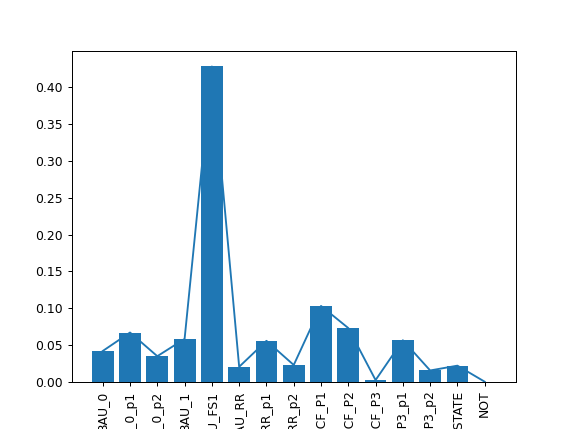

In [64]:
plt.plot([key for key in regimeAmounts.keys()],[val for val in regimeAmounts.values()])

In [65]:
plt.bar(range(len(regimeAmounts)), list(regimeAmounts.values()), align='center')
plt.xticks(range(len(regimeAmounts)), list(regimeAmounts.keys()),rotation="vertical")

([<matplotlib.axis.XTick at 0x7f4a9dac22e0>,
 [Text(0, 0, 'BAU_0'),
  Text(0, 0, 'BAU_0_p1'),
  Text(0, 0, 'BAU_0_p2'),
  Text(0, 0, 'BAU_1'),
  Text(0, 0, 'BAU_FS1'),
  Text(0, 0, 'BAU_RR'),
  Text(0, 0, 'BAU_RR_p1'),
  Text(0, 0, 'BAU_RR_p2'),
  Text(0, 0, 'CCF_P1'),
  Text(0, 0, 'CCF_P2'),
  Text(0, 0, 'CCF_P3'),
  Text(0, 0, 'CCF_P3_p1'),
  Text(0, 0, 'CCF_P3_p2'),
  Text(0, 0, 'CCF_STATE'),
  Text(0, 0, 'NOT')])

## Export data as csv
- Solution_alldata contains the optimal regime per stand AND the timely development of indicator values plus all other input columns (represented_are_by_NFIplot, region, NUTS2)
- Solution contains only the selected optimal regime and its share (if multiple regimes per stand are selected)

In [66]:
if glob_demands == True : 
    approach_glob = "Glob_"+approach
else :
    approach_glob = "NoGlob"
approach_glob

'Glob_bottomup'

In [67]:
import pandas as pd
import os

In [68]:
import os

try:
    os.mkdir("results")
except FileExistsError:
    pass
b = []
c = []
for key in mfo.regimesDecision.keys():
    if mfo.regimesDecision[key].solution_value() > 0:
        b = b+ [(key[0],x*5+2012, key[1]) for x in range(0,21)]
        c = c+ [(key[0],key[1],mfo.regimesDecision[key].solution_value())]
data2b = mfo.data.iloc[mfo.data.index.isin(b)]
data2b.to_csv("./results/"+approach_glob+'_'+scenario+"_"+RCP+"_data.csv")
c1 = pd.DataFrame(c)
c1.to_csv("./results/"+approach_glob+'_'+scenario+"_"+RCP+"_solutions.csv")

## Export objective ranges

In [69]:
for key in mfo.regimesDecision.keys():
        print(key,mfo.regimesDecision[key].solution_value())

(6, 'BAU_0') 0.0
(6, 'BAU_0_p1') 1.0
(6, 'BAU_0_p2') 0.0
(6, 'BAU_1') 0.0
(6, 'BAU_FS1') 0.0
(6, 'BAU_RR') 0.0
(6, 'BAU_RR_p1') 0.0
(6, 'BAU_RR_p2') 0.0
(6, 'CCF_P1') 0.0
(6, 'CCF_P2') 0.0
(6, 'CCF_P3') 0.0
(6, 'CCF_P3_p1') 0.0
(6, 'CCF_P3_p2') 0.0
(6, 'CCF_STATE') 0.0
(6, 'NOT') 0.0
(10, 'BAU_0') 0.9999999999999999
(10, 'BAU_0_p1') 0.0
(10, 'BAU_0_p2') 0.0
(10, 'BAU_1') 0.0
(10, 'BAU_FS1') 0.0
(10, 'BAU_RR') 0.0
(10, 'BAU_RR_p1') 0.0
(10, 'BAU_RR_p2') 0.0
(10, 'CCF_P1') 0.0
(10, 'CCF_P2') 0.0
(10, 'CCF_P3') 0.0
(10, 'CCF_P3_p1') 0.0
(10, 'CCF_P3_p2') 0.0
(10, 'CCF_STATE') 0.0
(10, 'NOT') 0.0
(14, 'BAU_0') 0.0
(14, 'BAU_0_p1') 0.0
(14, 'BAU_0_p2') 0.0
(14, 'BAU_1') 0.0
(14, 'BAU_FS1') 0.0
(14, 'BAU_RR') 0.0
(14, 'BAU_RR_p1') 0.0
(14, 'BAU_RR_p2') 0.0
(14, 'CCF_P1') 0.0
(14, 'CCF_P2') 1.0
(14, 'CCF_P3') 0.0
(14, 'CCF_P3_p1') 0.0
(14, 'CCF_P3_p2') 0.0
(14, 'CCF_STATE') 0.0
(14, 'NOT') 0.0
(18, 'BAU_0') 0.0
(18, 'BAU_0_p1') 0.0
(18, 'BAU_0_p2') 0.0
(18, 'BAU_1') 0.0
(18, 'BAU_FS1') 0.0
(1

(288, 'NOT') 0.0
(291, 'BAU_0') 0.0
(291, 'BAU_0_p1') 0.0
(291, 'BAU_0_p2') 0.0
(291, 'BAU_1') 0.0
(291, 'BAU_FS1') 1.0
(291, 'BAU_RR') 0.0
(291, 'BAU_RR_p1') 0.0
(291, 'BAU_RR_p2') 0.0
(291, 'CCF_P1') 0.0
(291, 'CCF_P2') 0.0
(291, 'CCF_P3') 0.0
(291, 'CCF_P3_p1') 0.0
(291, 'CCF_P3_p2') 0.0
(291, 'CCF_STATE') 0.0
(291, 'NOT') 0.0
(307, 'BAU_0') 6.049674561083288e-14
(307, 'BAU_0_p1') 1.0
(307, 'BAU_0_p2') 0.0
(307, 'BAU_1') 0.0
(307, 'BAU_FS1') 0.0
(307, 'BAU_RR') 0.0
(307, 'BAU_RR_p1') -6.047920717430501e-14
(307, 'BAU_RR_p2') 0.0
(307, 'CCF_P1') 0.0
(307, 'CCF_P2') 0.0
(307, 'CCF_P3') 0.0
(307, 'CCF_P3_p1') 0.0
(307, 'CCF_P3_p2') 0.0
(307, 'CCF_STATE') 0.0
(307, 'NOT') 0.0
(309, 'BAU_0') 0.0
(309, 'BAU_0_p1') 0.6792995853248198
(309, 'BAU_0_p2') 0.0
(309, 'BAU_1') 0.0
(309, 'BAU_FS1') 0.32070041467909377
(309, 'BAU_RR') 0.0
(309, 'BAU_RR_p1') 0.0
(309, 'BAU_RR_p2') 0.0
(309, 'CCF_P1') 0.0
(309, 'CCF_P2') 0.0
(309, 'CCF_P3') 0.0
(309, 'CCF_P3_p1') 0.0
(309, 'CCF_P3_p2') -3.91354300279

(535, 'CCF_P3_p1') 1.6378701812455927e-11
(535, 'CCF_P3_p2') 0.0
(535, 'CCF_STATE') 0.0
(535, 'NOT') 0.0
(543, 'BAU_0') 0.0
(543, 'BAU_0_p1') 0.0
(543, 'BAU_0_p2') 0.0
(543, 'BAU_1') 0.0
(543, 'BAU_FS1') 0.0
(543, 'BAU_RR') 0.0
(543, 'BAU_RR_p1') 0.0
(543, 'BAU_RR_p2') 0.0
(543, 'CCF_P1') 0.0
(543, 'CCF_P2') 0.0
(543, 'CCF_P3') 0.0
(543, 'CCF_P3_p1') 0.9999999999999999
(543, 'CCF_P3_p2') 0.0
(543, 'CCF_STATE') 0.0
(543, 'NOT') 0.0
(557, 'BAU_0') 0.0
(557, 'BAU_0_p1') 0.0
(557, 'BAU_0_p2') 0.0
(557, 'BAU_1') 0.0
(557, 'BAU_FS1') 0.0
(557, 'BAU_RR') 0.0
(557, 'BAU_RR_p1') 0.0
(557, 'BAU_RR_p2') 0.0
(557, 'CCF_P1') 0.0
(557, 'CCF_P2') 0.0
(557, 'CCF_P3') 0.0
(557, 'CCF_P3_p1') 1.0
(557, 'CCF_P3_p2') 0.0
(557, 'CCF_STATE') 0.0
(557, 'NOT') 0.0
(559, 'BAU_0') 0.0
(559, 'BAU_0_p1') 0.0
(559, 'BAU_0_p2') 0.0
(559, 'BAU_1') 0.0
(559, 'BAU_FS1') 1.0
(559, 'BAU_RR') 0.0
(559, 'BAU_RR_p1') 0.0
(559, 'BAU_RR_p2') 0.0
(559, 'CCF_P1') 0.0
(559, 'CCF_P2') 0.0
(559, 'CCF_P3') 0.0
(559, 'CCF_P3_p1') 0.

(944, 'BAU_0_p1') 0.0
(944, 'BAU_0_p2') 0.0
(944, 'BAU_1') 0.0
(944, 'BAU_FS1') 1.0
(944, 'BAU_RR') 0.0
(944, 'BAU_RR_p1') 0.0
(944, 'BAU_RR_p2') 0.0
(944, 'CCF_P1') 0.0
(944, 'CCF_P2') 0.0
(944, 'CCF_P3') 0.0
(944, 'CCF_P3_p1') 0.0
(944, 'CCF_P3_p2') 0.0
(944, 'CCF_STATE') 0.0
(944, 'NOT') 0.0
(946, 'BAU_0') 0.0
(946, 'BAU_0_p1') 0.0
(946, 'BAU_0_p2') 0.0
(946, 'BAU_1') 0.0
(946, 'BAU_FS1') 1.0
(946, 'BAU_RR') 0.0
(946, 'BAU_RR_p1') 0.0
(946, 'BAU_RR_p2') 0.0
(946, 'CCF_P1') 0.0
(946, 'CCF_P2') 0.0
(946, 'CCF_P3') 0.0
(946, 'CCF_P3_p1') 8.461892084499557e-12
(946, 'CCF_P3_p2') -8.46185032767869e-12
(946, 'CCF_STATE') 0.0
(946, 'NOT') 0.0
(952, 'BAU_0') -4.070097607858533e-12
(952, 'BAU_0_p1') 0.0
(952, 'BAU_0_p2') 0.0
(952, 'BAU_1') 0.0
(952, 'BAU_FS1') 1.0000000000037037
(952, 'BAU_RR') 0.0
(952, 'BAU_RR_p1') 0.0
(952, 'BAU_RR_p2') 0.0
(952, 'CCF_P1') 0.0
(952, 'CCF_P2') 0.0
(952, 'CCF_P3') 0.0
(952, 'CCF_P3_p1') 0.0
(952, 'CCF_P3_p2') 0.0
(952, 'CCF_STATE') 0.0
(952, 'NOT') 0.0
(954

(1380, 'BAU_RR') 0.0
(1380, 'BAU_RR_p1') 0.0
(1380, 'BAU_RR_p2') 0.0
(1380, 'CCF_P1') 0.0
(1380, 'CCF_P2') 0.0
(1380, 'CCF_P3') 0.0
(1380, 'CCF_P3_p1') 0.0
(1380, 'CCF_P3_p2') 0.0
(1380, 'CCF_STATE') -1.069738990080949e-11
(1380, 'NOT') 0.0
(1390, 'BAU_0') -2.28710551028664e-13
(1390, 'BAU_0_p1') 0.0
(1390, 'BAU_0_p2') 0.0
(1390, 'BAU_1') 1.0
(1390, 'BAU_FS1') 0.0
(1390, 'BAU_RR') 0.0
(1390, 'BAU_RR_p1') 0.0
(1390, 'BAU_RR_p2') 0.0
(1390, 'CCF_P1') 0.0
(1390, 'CCF_P2') 0.0
(1390, 'CCF_P3') 0.0
(1390, 'CCF_P3_p1') 0.0
(1390, 'CCF_P3_p2') 0.0
(1390, 'CCF_STATE') 0.0
(1390, 'NOT') 0.0
(1401, 'BAU_0') 0.0
(1401, 'BAU_0_p1') -1.3515850230302196e-11
(1401, 'BAU_0_p2') 0.0
(1401, 'BAU_1') 0.0
(1401, 'BAU_FS1') 1.0
(1401, 'BAU_RR') 0.0
(1401, 'BAU_RR_p1') 0.0
(1401, 'BAU_RR_p2') 0.0
(1401, 'CCF_P1') 0.0
(1401, 'CCF_P2') 0.0
(1401, 'CCF_P3') 0.0
(1401, 'CCF_P3_p1') 1.3515773109439265e-11
(1401, 'CCF_P3_p2') 0.0
(1401, 'CCF_STATE') 0.0
(1401, 'NOT') 0.0
(1404, 'BAU_0') 0.0
(1404, 'BAU_0_p1') 0.0

(1680, 'CCF_P3_p1') -7.86026809864389e-13
(1680, 'CCF_P3_p2') 0.0
(1680, 'CCF_STATE') 0.0
(1680, 'NOT') 0.0
(1682, 'BAU_0') 0.0
(1682, 'BAU_0_p1') 0.0
(1682, 'BAU_0_p2') 0.0
(1682, 'BAU_1') 4.959721820787843e-12
(1682, 'BAU_FS1') 0.0
(1682, 'BAU_RR') 0.0
(1682, 'BAU_RR_p1') 1.0
(1682, 'BAU_RR_p2') 0.0
(1682, 'CCF_P1') 0.0
(1682, 'CCF_P2') 0.0
(1682, 'CCF_P3') 0.0
(1682, 'CCF_P3_p1') 0.0
(1682, 'CCF_P3_p2') -4.959757263043025e-12
(1682, 'CCF_STATE') 0.0
(1682, 'NOT') 0.0
(1683, 'BAU_0') 0.0
(1683, 'BAU_0_p1') 0.0
(1683, 'BAU_0_p2') 0.0
(1683, 'BAU_1') 0.0
(1683, 'BAU_FS1') 0.0
(1683, 'BAU_RR') 0.0
(1683, 'BAU_RR_p1') 0.0
(1683, 'BAU_RR_p2') 0.0
(1683, 'CCF_P1') 1.0
(1683, 'CCF_P2') 0.0
(1683, 'CCF_P3') 0.0
(1683, 'CCF_P3_p1') 0.0
(1683, 'CCF_P3_p2') 0.0
(1683, 'CCF_STATE') 0.0
(1683, 'NOT') 0.0
(1694, 'BAU_0') 0.0
(1694, 'BAU_0_p1') -1.0674868135121137e-12
(1694, 'BAU_0_p2') 0.0
(1694, 'BAU_1') 1.0674853026703216e-12
(1694, 'BAU_FS1') 1.0
(1694, 'BAU_RR') 0.0
(1694, 'BAU_RR_p1') 0.0
(16

(1923, 'CCF_P3_p2') 0.0
(1923, 'CCF_STATE') 0.0
(1923, 'NOT') 0.0
(1946, 'BAU_0') 1.0
(1946, 'BAU_0_p1') 0.0
(1946, 'BAU_0_p2') 4.487399633033912e-12
(1946, 'BAU_1') 0.0
(1946, 'BAU_FS1') 0.0
(1946, 'BAU_RR') 0.0
(1946, 'BAU_RR_p1') 0.0
(1946, 'BAU_RR_p2') 0.0
(1946, 'CCF_P1') 0.0
(1946, 'CCF_P2') 0.0
(1946, 'CCF_P3') 0.0
(1946, 'CCF_P3_p1') -4.48743930944543e-12
(1946, 'CCF_P3_p2') 0.0
(1946, 'CCF_STATE') 0.0
(1946, 'NOT') 0.0
(1948, 'BAU_0') 0.0
(1948, 'BAU_0_p1') 0.0
(1948, 'BAU_0_p2') 0.0
(1948, 'BAU_1') 0.0
(1948, 'BAU_FS1') 0.9999999999999999
(1948, 'BAU_RR') 0.0
(1948, 'BAU_RR_p1') 0.0
(1948, 'BAU_RR_p2') 0.0
(1948, 'CCF_P1') 0.0
(1948, 'CCF_P2') 0.0
(1948, 'CCF_P3') 0.0
(1948, 'CCF_P3_p1') 0.0
(1948, 'CCF_P3_p2') 0.0
(1948, 'CCF_STATE') 0.0
(1948, 'NOT') 0.0
(1959, 'BAU_0') 0.0
(1959, 'BAU_0_p1') 0.0
(1959, 'BAU_0_p2') 0.0
(1959, 'BAU_1') 0.0
(1959, 'BAU_FS1') 0.0
(1959, 'BAU_RR') 0.0
(1959, 'BAU_RR_p1') 0.0
(1959, 'BAU_RR_p2') 0.0
(1959, 'CCF_P1') 0.0
(1959, 'CCF_P2') 1.0
(195

(2198, 'CCF_P3_p1') 0.0
(2198, 'CCF_P3_p2') -2.1468439376061263e-12
(2198, 'CCF_STATE') 0.0
(2198, 'NOT') 0.0
(2205, 'BAU_0') 5.8447229382795505e-12
(2205, 'BAU_0_p1') 0.0
(2205, 'BAU_0_p2') 1.0
(2205, 'BAU_1') 0.0
(2205, 'BAU_FS1') 0.0
(2205, 'BAU_RR') 0.0
(2205, 'BAU_RR_p1') 0.0
(2205, 'BAU_RR_p2') 0.0
(2205, 'CCF_P1') 0.0
(2205, 'CCF_P2') 0.0
(2205, 'CCF_P3') 0.0
(2205, 'CCF_P3_p1') 0.0
(2205, 'CCF_P3_p2') -5.844808454270391e-12
(2205, 'CCF_STATE') 0.0
(2205, 'NOT') 0.0
(2219, 'BAU_0') 0.0
(2219, 'BAU_0_p1') 0.0
(2219, 'BAU_0_p2') 2.1573339597497876e-12
(2219, 'BAU_1') -2.1573630070204395e-12
(2219, 'BAU_FS1') 1.0
(2219, 'BAU_RR') 0.0
(2219, 'BAU_RR_p1') 0.0
(2219, 'BAU_RR_p2') 0.0
(2219, 'CCF_P1') 0.0
(2219, 'CCF_P2') 0.0
(2219, 'CCF_P3') 0.0
(2219, 'CCF_P3_p1') 0.0
(2219, 'CCF_P3_p2') 0.0
(2219, 'CCF_STATE') 0.0
(2219, 'NOT') 0.0
(2220, 'BAU_0') 0.0
(2220, 'BAU_0_p1') 0.0
(2220, 'BAU_0_p2') 0.0
(2220, 'BAU_1') 0.0
(2220, 'BAU_FS1') 1.0
(2220, 'BAU_RR') 0.0
(2220, 'BAU_RR_p1') 0.0


(2544, 'BAU_0') 0.0
(2544, 'BAU_0_p1') 0.0
(2544, 'BAU_0_p2') 0.0
(2544, 'BAU_1') 0.0
(2544, 'BAU_FS1') 1.0
(2544, 'BAU_RR') 0.0
(2544, 'BAU_RR_p1') 0.0
(2544, 'BAU_RR_p2') 0.0
(2544, 'CCF_P1') 0.0
(2544, 'CCF_P2') 0.0
(2544, 'CCF_P3') 0.0
(2544, 'CCF_P3_p1') 0.0
(2544, 'CCF_P3_p2') 0.0
(2544, 'CCF_STATE') 0.0
(2544, 'NOT') 0.0
(2547, 'BAU_0') 0.0
(2547, 'BAU_0_p1') 0.0
(2547, 'BAU_0_p2') 0.0
(2547, 'BAU_1') 0.0
(2547, 'BAU_FS1') 1.0
(2547, 'BAU_RR') 0.0
(2547, 'BAU_RR_p1') 0.0
(2547, 'BAU_RR_p2') 0.0
(2547, 'CCF_P1') 0.0
(2547, 'CCF_P2') 0.0
(2547, 'CCF_P3') 0.0
(2547, 'CCF_P3_p1') 0.0
(2547, 'CCF_P3_p2') 0.0
(2547, 'CCF_STATE') 0.0
(2547, 'NOT') 0.0
(2550, 'BAU_0') 0.0
(2550, 'BAU_0_p1') 0.0
(2550, 'BAU_0_p2') 0.0
(2550, 'BAU_1') 0.0
(2550, 'BAU_FS1') 1.0
(2550, 'BAU_RR') 6.3962331897320095e-12
(2550, 'BAU_RR_p1') 0.0
(2550, 'BAU_RR_p2') 0.0
(2550, 'CCF_P1') 0.0
(2550, 'CCF_P2') 0.0
(2550, 'CCF_P3') 0.0
(2550, 'CCF_P3_p1') 0.0
(2550, 'CCF_P3_p2') -5.004924768027107e-12
(2550, 'CCF_ST

(2871, 'CCF_P1') 0.0
(2871, 'CCF_P2') 0.0
(2871, 'CCF_P3') 0.0
(2871, 'CCF_P3_p1') -2.7106535727225525e-12
(2871, 'CCF_P3_p2') 0.0
(2871, 'CCF_STATE') 0.0
(2871, 'NOT') 0.0
(2875, 'BAU_0') 0.0
(2875, 'BAU_0_p1') 0.0
(2875, 'BAU_0_p2') 0.0
(2875, 'BAU_1') 0.0
(2875, 'BAU_FS1') 0.0
(2875, 'BAU_RR') 0.0
(2875, 'BAU_RR_p1') 0.0
(2875, 'BAU_RR_p2') 0.0
(2875, 'CCF_P1') 0.0
(2875, 'CCF_P2') 0.0
(2875, 'CCF_P3') 0.0
(2875, 'CCF_P3_p1') 1.000000000012078
(2875, 'CCF_P3_p2') -1.2077884036876074e-11
(2875, 'CCF_STATE') 0.0
(2875, 'NOT') 0.0
(2879, 'BAU_0') 6.706263113475489e-12
(2879, 'BAU_0_p1') 0.0
(2879, 'BAU_0_p2') 0.0
(2879, 'BAU_1') 1.0
(2879, 'BAU_FS1') 0.0
(2879, 'BAU_RR') 0.0
(2879, 'BAU_RR_p1') 0.0
(2879, 'BAU_RR_p2') 0.0
(2879, 'CCF_P1') 0.0
(2879, 'CCF_P2') 0.0
(2879, 'CCF_P3') 0.0
(2879, 'CCF_P3_p1') 0.0
(2879, 'CCF_P3_p2') -6.706301926485052e-12
(2879, 'CCF_STATE') 0.0
(2879, 'NOT') 0.0
(2885, 'BAU_0') 0.0
(2885, 'BAU_0_p1') 0.0
(2885, 'BAU_0_p2') 0.0
(2885, 'BAU_1') 0.0
(2885, 'BA

(3183, 'NOT') 0.0
(3184, 'BAU_0') 0.0
(3184, 'BAU_0_p1') 0.0
(3184, 'BAU_0_p2') 0.0
(3184, 'BAU_1') 0.0
(3184, 'BAU_FS1') 0.9999999999999999
(3184, 'BAU_RR') 0.0
(3184, 'BAU_RR_p1') 0.0
(3184, 'BAU_RR_p2') 0.0
(3184, 'CCF_P1') 0.0
(3184, 'CCF_P2') 0.0
(3184, 'CCF_P3') 0.0
(3184, 'CCF_P3_p1') 0.0
(3184, 'CCF_P3_p2') 0.0
(3184, 'CCF_STATE') 0.0
(3184, 'NOT') 0.0
(3191, 'BAU_0') 0.0
(3191, 'BAU_0_p1') 0.0
(3191, 'BAU_0_p2') 0.0
(3191, 'BAU_1') 0.0
(3191, 'BAU_FS1') 1.0
(3191, 'BAU_RR') 0.0
(3191, 'BAU_RR_p1') 0.0
(3191, 'BAU_RR_p2') 3.882028442011528e-11
(3191, 'CCF_P1') 0.0
(3191, 'CCF_P2') 0.0
(3191, 'CCF_P3') 0.0
(3191, 'CCF_P3_p1') 0.0
(3191, 'CCF_P3_p2') 0.0
(3191, 'CCF_STATE') -3.8820387428508074e-11
(3191, 'NOT') 0.0
(3192, 'BAU_0') 0.0
(3192, 'BAU_0_p1') 0.0
(3192, 'BAU_0_p2') 0.0
(3192, 'BAU_1') 0.0
(3192, 'BAU_FS1') 0.0
(3192, 'BAU_RR') 0.0
(3192, 'BAU_RR_p1') 0.0
(3192, 'BAU_RR_p2') 0.0
(3192, 'CCF_P1') 0.0
(3192, 'CCF_P2') 1.000000000019688
(3192, 'CCF_P3') 0.0
(3192, 'CCF_P3_

(3419, 'CCF_P1') 0.0
(3419, 'CCF_P2') 0.0
(3419, 'CCF_P3') 0.0
(3419, 'CCF_P3_p1') 0.0
(3419, 'CCF_P3_p2') 0.0
(3419, 'CCF_STATE') 0.0
(3419, 'NOT') 0.0
(3430, 'BAU_0') 0.0
(3430, 'BAU_0_p1') 0.0
(3430, 'BAU_0_p2') 0.0
(3430, 'BAU_1') 0.0
(3430, 'BAU_FS1') 0.0
(3430, 'BAU_RR') 0.0
(3430, 'BAU_RR_p1') 1.0
(3430, 'BAU_RR_p2') 4.4896157716065796e-12
(3430, 'CCF_P1') 0.0
(3430, 'CCF_P2') -5.688133465887676e-13
(3430, 'CCF_P3') 0.0
(3430, 'CCF_P3_p1') 0.0
(3430, 'CCF_P3_p2') -3.920786776737777e-12
(3430, 'CCF_STATE') 0.0
(3430, 'NOT') 0.0
(3431, 'BAU_0') 0.0
(3431, 'BAU_0_p1') 2.9903483445535633e-12
(3431, 'BAU_0_p2') 1.0
(3431, 'BAU_1') 0.0
(3431, 'BAU_FS1') 0.0
(3431, 'BAU_RR') 0.0
(3431, 'BAU_RR_p1') 0.0
(3431, 'BAU_RR_p2') 0.0
(3431, 'CCF_P1') 0.0
(3431, 'CCF_P2') 0.0
(3431, 'CCF_P3') 0.0
(3431, 'CCF_P3_p1') 0.0
(3431, 'CCF_P3_p2') -2.9224289988492984e-12
(3431, 'CCF_STATE') 0.0
(3431, 'NOT') 0.0
(3442, 'BAU_0') 0.0
(3442, 'BAU_0_p1') 0.0
(3442, 'BAU_0_p2') 0.0
(3442, 'BAU_1') 1.0
(3442

(3778, 'BAU_1') 0.0
(3778, 'BAU_FS1') 0.0
(3778, 'BAU_RR') 0.0
(3778, 'BAU_RR_p1') 0.0
(3778, 'BAU_RR_p2') 0.0
(3778, 'CCF_P1') 3.682214700627385e-11
(3778, 'CCF_P2') 0.0
(3778, 'CCF_P3') 0.0
(3778, 'CCF_P3_p1') 1.0
(3778, 'CCF_P3_p2') 0.0
(3778, 'CCF_STATE') 0.0
(3778, 'NOT') 0.0


Save as json file

In [70]:
import json
mfo.objectiveRanges

with open('./objectiveRanges_'+approach_glob+'_'+scenario+'_'+RCP+'.json', 'w') as json_file:
  json.dump(mfo.objectiveRanges, json_file)

Save as CSV.

In [71]:
import pandas
df = pandas.read_json('./objectiveRanges_'+approach_glob+'_'+scenario+'_'+RCP+'.json')

df.to_csv('./objectiveRanges_'+approach_glob+'_'+scenario+'_'+RCP+'.csv')

## Export objective values
The optimal solution for each objective.

In [72]:
import os
with open("./objectiveValues_"+approach_glob+"_"+scenario+"_"+RCP+".csv","w") as file:
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+objName)
        delim = ","
    file.write("\n")
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+str(mfo.objective[objName].solution_value()))
        delim = ","
    file.write("\n")